# Lightning Introduction to Python - part 3

There are many modules available for scientific computation, but the most basic and frequently used workhorses are Numpy (http://www.numpy.org), SciPy (https://www.scipy.org/scipylib/index.html), and Matplotlib (https://matplotlib.org). Numpy provides an efficent _array_ structure that is a basis for many scientific applications, such as SciPy. Matplotlib is the most widely used plotting module. These modules contain tons of functions that you can read about, but here we show some of the use examples that can be useful in the course.

First, we import the modules

In [2]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
%matplotlib nbagg
# %matplotlib inline

## Simple time series generation

Let's consider a problem of generating a very simple time series $X(t)$ given by

$$
X(t+1) = (1-dt/T) X(t),
$$

which is equivalent to solving a differential equation $ dX/dt = -X/T$ with a time step $dt$.

To solve this problem, we first make an array to hold our data, _X_(_t_), and iteratively solve the equation.

In [3]:
L = 1001 # From X(0), we generate X(1), X(2), X(3), ...., up to X(1000)
x = np.zeros(L) # make an array with L zeros
x[0] = 1 # we begin from X(0) = 1

# arbitraty parameters...
dt = 0.01
T = 1.0

for t in range(L-1):
    x[t+1] = (1-dt/T)*x[t]


<IPython.core.display.Javascript object>


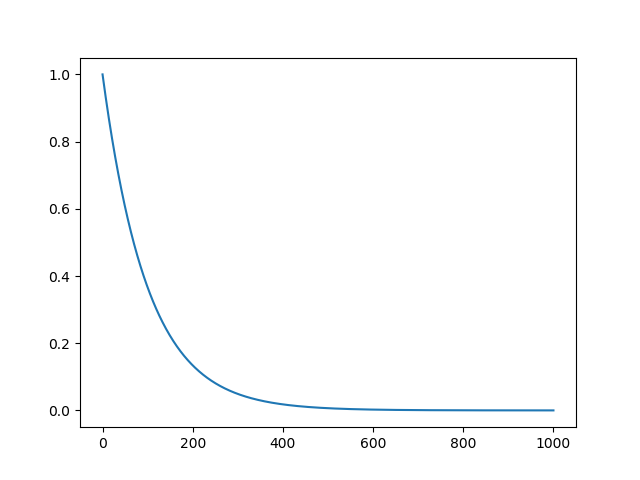

In [4]:
t = np.arange(L)

fig, ax = plt.subplots()
ax.plot(t, x)

We save this figure as a PNG file, and save bins, counts and log(counts) into a MATLAB file.

In [5]:
fig.savefig("time_series.png")

scipy.io.savemat("time_series.mat",
                 {
                     "t": t,
                     "x": x,
                 })

Let's check if everything is saved correctly!

In [6]:
data = scipy.io.loadmat('time_series.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Jan 17 13:32:30 2018', '__version__': '1.0', '__globals__': [], 't': array([[   0,    1,    2, ...,  998,  999, 1000]]), 'x': array([[1.00000000e+00, 9.90000000e-01, 9.80100000e-01, ...,
        4.40477986e-05, 4.36073206e-05, 4.31712474e-05]])}


In [ ]:
fig, ax = plt.subplots()
ax.plot(data['t'], data['x'])

## Reading experimental data and writing analysis

Here we show an example of analysis on experimental data.

Here we use Numpy's `loadtxt` to load our data in a text file.

In [ ]:
isi = np.loadtxt('data/isis_184.txt') # load the text da
print(isi)

Here we want to compare what the data look like when we take log of them.

In [ ]:
logisi = np.log10(isi)

# Following http://pbpython.com/effective-matplotlib.html
_, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].plot(isi)
ax[1].plot(logisi)
ax[0].set(title = "Interspike intervals", xlabel="", ylabel="ISI (ms)")
ax[1].set(title = "Log(ISI)", xlabel="Spike", ylabel="log(ISI)")

Now we compute a histogram of the data. Note that `bins` in the result represent left and right edges of the bins, and is bigger than `counts`.

In [ ]:
counts, bins = np.histogram(logisi, bins=50)
print(bins)
print('Bin size = ', bins.size)
print(counts)
print('Counts = ', counts.size)

Now we plot the histogram, and also log of the counts, side by side.

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(bins[:-1], counts)                  # Note indexing
ax[0].set(xlabel="log(ISI)", ylabel="Counts")

log_counts = np.log10(counts+0.5)
ax[1].plot(bins[:-1], log_counts)
ax[1].set(xlabel="log(ISI)", ylabel="log10(Counts)")


We save this figure as a PNG file, and save bins, counts and log(counts) into a MATLAB file.

In [ ]:
fig.savefig("histograms_logisi_184.png")

scipy.io.savemat("data_histograms_logisi_184.mat",
                 {
                     "bins": bins,
                     "counts": counts,
                     "log_counts": log_counts
                 })

Let's check if everything is saved correctly!

In [ ]:
data = scipy.io.loadmat('data_histograms_logisi_184.mat')
print(data)

In [ ]:
bins = data['bins']
counts = data['counts']
log_counts = data['log_counts']


fig, ax = plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(bins[:-1], counts)
ax[0].set(xlabel="log(ISI)", ylabel="Counts")

log_counts = np.log10(counts+0.5)
ax[1].plot(bins[:-1], log_counts)
ax[1].set(xlabel="log(ISI)", ylabel="log10(Counts)")